In [1]:
# Sentiment Analysis with NLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
import string

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srila\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\srila\AppData\Roaming\nltk_data...


True

In [4]:
data = {
    'review': [
        "I love this product! It's amazing and works perfectly.",
        "Terrible experience. The item broke after 2 days.",
        "Good quality for the price. I'm satisfied with my purchase.",
        "Not what I expected. The description was misleading.",
        "Excellent service and fast delivery. Highly recommend!",
        "The worst product I've ever bought. Complete waste of money.",
        "It's okay, nothing special. Does the job but could be better.",
        "Absolutely fantastic! Exceeded all my expectations.",
        "Poor customer service. They didn't respond to my complaints.",
        "Great value. Works as described. Very happy with it."
    ],
    'sentiment': ['positive', 'negative', 'positive', 'negative', 
                  'positive', 'negative', 'neutral', 'positive', 
                  'negative', 'positive']
}

df = pd.DataFrame(data)

# Display the dataset
print("Sample Dataset:")
print(df.head)


Sample Dataset:
<bound method NDFrame.head of                                               review sentiment
0  I love this product! It's amazing and works pe...  positive
1  Terrible experience. The item broke after 2 days.  negative
2  Good quality for the price. I'm satisfied with...  positive
3  Not what I expected. The description was misle...  negative
4  Excellent service and fast delivery. Highly re...  positive
5  The worst product I've ever bought. Complete w...  negative
6  It's okay, nothing special. Does the job but c...   neutral
7  Absolutely fantastic! Exceeded all my expectat...  positive
8  Poor customer service. They didn't respond to ...  negative
9  Great value. Works as described. Very happy wi...  positive>


In [5]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [7]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    words = text.split()
    
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join back to string
    return ' '.join(words)

# Apply preprocessing to reviews
df['cleaned_review'] = df['review'].apply(preprocess_text)

print("\nPreprocessed Reviews:")
print(df[['review', 'cleaned_review']].head())


Preprocessed Reviews:
                                              review  \
0  I love this product! It's amazing and works pe...   
1  Terrible experience. The item broke after 2 days.   
2  Good quality for the price. I'm satisfied with...   
3  Not what I expected. The description was misle...   
4  Excellent service and fast delivery. Highly re...   

                                     cleaned_review  
0               love product amazing work perfectly  
1                terrible experience item broke day  
2          good quality price im satisfied purchase  
3                   expected description misleading  
4  excellent service fast delivery highly recommend  


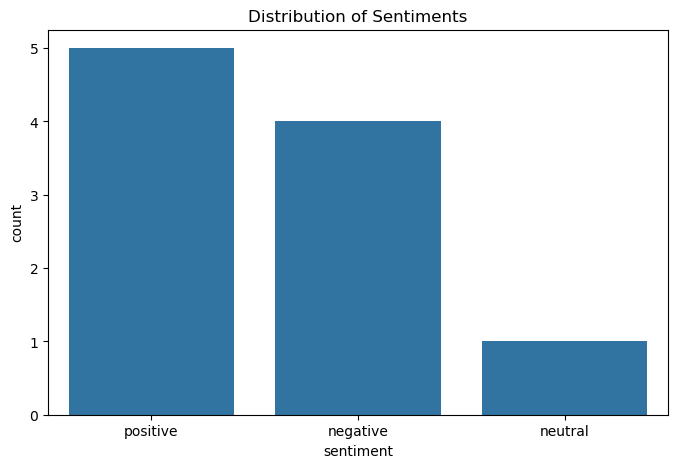

In [8]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

In [9]:
tfidf = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features


In [10]:
X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment']

In [11]:
print("\nSample TF-IDF Features:")
print(tfidf.get_feature_names_out()[:20])  # First 20 features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")



Sample TF-IDF Features:
['absolutely' 'amazing' 'better' 'bought' 'broke' 'complaint' 'complete'
 'could' 'customer' 'day' 'delivery' 'described' 'description' 'didnt'
 'ever' 'exceeded' 'excellent' 'expectation' 'expected' 'experience']

Training samples: 8
Testing samples: 2


In [12]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Model Evaluation

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       2.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

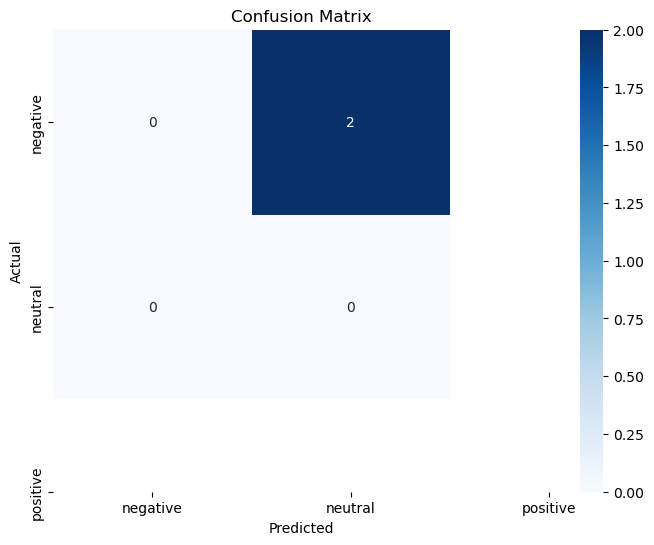

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
def predict_sentiment(text):
    # Preprocess
    cleaned_text = preprocess_text(text)
    
    # Vectorize
    text_vector = tfidf.transform([cleaned_text])
    
    # Predict
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector).max()
    
    return prediction, probability

# Test with some new reviews
new_reviews = [
    "This is the best purchase I've made all year!",
    "I'm very disappointed with the quality.",
    "It's fine, but I expected better for the price.",
    "Absolutely horrible experience from start to finish.",
    "Great product, fast shipping, excellent service."
]

In [15]:
print("\nNew Review Predictions:")
for review in new_reviews:
    pred, prob = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {pred} (Confidence: {prob:.2f})")
    print()


New Review Predictions:
Review: This is the best purchase I've made all year!
Predicted Sentiment: positive (Confidence: 0.62)

Review: I'm very disappointed with the quality.
Predicted Sentiment: positive (Confidence: 0.69)

Review: It's fine, but I expected better for the price.
Predicted Sentiment: positive (Confidence: 0.57)

Review: Absolutely horrible experience from start to finish.
Predicted Sentiment: positive (Confidence: 0.67)

Review: Great product, fast shipping, excellent service.
Predicted Sentiment: positive (Confidence: 0.70)

